In [1]:
import os

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
import regex as rx

### Setup

In [9]:
lothar = '/home/enno/uni/SS24/thesis/1_RegEx'

In [10]:
if os.getcwd() != lothar:
    input_file = '/ebio/abt1_share/prediction_hendecads/0_data/npf_data/final_dataset.fasta'  # "/home/enno/uni/SS23/thesis/data/hendecads/sequences.fasta"
else:
    input_file = '/home/enno/uni/SS24/thesis/1_RegEx/0_data/sequences.fasta'
    clans_file = '/home/enno/uni/SS24/thesis/1_RegEx/0_data/new_hendecads_1E-14.clans'
    df = pd.read_csv('/home/enno/uni/SS24/thesis/1_RegEx/0_data/regEx.csv')
    
fasta_sequences = list(SeqIO.parse(open(input_file),'fasta'))
n_seq = len(fasta_sequences)

In [4]:
# Read .fasta file, extract stretches and store them in a df

df = pd.DataFrame(columns=['id', 'seq', 'stretch_ix', 'stretch_seq'])

pattern = r'\[\[.*?\]\]'

for seq_ix, seq in enumerate(list(SeqIO.parse(open(input_file), 'fasta'))):

    print(f"Processing sequence {seq_ix+1}/{n_seq}", end='\r')
    
    s = str(seq.seq).lower()
    d = str(seq.description)
    
    stretches = eval(rx.findall(pattern, d.split('|||')[-1])[0])

    tmp_six = []
    tmp_seq = []

    for sx, stretch in enumerate(stretches):
                
        cc_ix = [x for x in range(stretch[0], stretch[1]+1)]
        stretch_seq = s[min(cc_ix):max(cc_ix)]

        tmp_six.append(cc_ix)
        tmp_seq.append(stretch_seq)
    
    df.loc[len(df), ] = [seq.id, s, tmp_six, tmp_seq]

In [11]:
df.head()

,id,seq,stretch_ix,stretch_seq,c,1R_0MM,1R_1MM,1R_2MM,3R_0MM,3R_1MM,3R_2MM,5R_0MM,5R_1MM,5R_2MM,10R_0MM,10R_1MM,10R_2MM
0,MCD6041253.1,mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",['rlvyvavaailcsfsttslagaektakragkfvektatragkfv...,-1.0,"[(['lvyvavaailc', 'vyvavaailcs', 'lagaektakra'...","[(['lvyvavaailc', 'vyvavaailcs', 'yvavaailcsf'...","[(['rlvyvavaail', 'lvyvavaailc', 'vyvavaailcs'...","[(['akragkfvektatragkfvertatkagkfvert', 'atrag...","[(['akragkfvektatragkfvertatkagkfvert', 'atrag...","[(['aailcsfsttslagaektakragkfvektatra', 'sttsl...","[([], [])]","[([], [])]",[(['sttslagaektakragkfvektatragkfvertatkagkfve...,"[([], [])]","[([], [])]","[([], [])]"
1,MCD7737945.1,mqgrvffreaaalilaaalsmaglpasaaansgieaaalrteeete...,"[[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, ...",['eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqe...,-1.0,"[([], [])]","[(['keavqetavet', 'eedagssveeq', 'veeqeesagsg'...","[(['tepstkeavqe', 'epstkeavqet', 'tkeavqetave'...","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]"
2,MYF28459.1,merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...",['erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaet...,-1.0,"[(['ihalrgemhae', 'isgvrervarv', 'varvethlqrt'...","[(['qtdllkeihal', 'llkeihalrge', 'lkeihalrgem'...","[(['erlqtdllkei', 'lqtdllkeiha', 'qtdllkeihal'...","[([], [])]","[([], [])]","[(['ihalrgemhaefasvrqemhagfasirqemhae', 'mhagf...","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]"
3,WP_168920948.1,msdvfltasyadrekvktlgarwnpaekrwyvpsgrdlspfaawlp...,"[[437, 438, 439, 440, 441, 442, 443, 444, 445,...",['aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaq...,41.0,"[(['aqslvveikha', 'vveikhaasqq', 'lllarhvvpar'...","[(['aqslvveikha', 'lvveikhaasq', 'vveikhaasqq'...","[(['aqslvveikha', 'qslvveikhaa', 'slvveikhaas'...","[([], [])]","[(['vveikhaasqqlllarhvvparmaevtaegrqa'], [[4, ...","[(['aqslvveikhaasqqlllarhvvparmaevtae', 'lvvei...","[([], [])]","[([], [])]",[(['vveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,"[([], [])]","[([], [])]","[([], [])]"
4,WP_026306873.1,mllrriarpllsaafiaegidilqnpgpladrlspaldftrrrsqh...,"[[172, 173, 174, 175, 176, 177, 178, 179, 180,...",['slgwrgrraardakdhaealaataaaiaatarergtnlvdtare...,37.0,"[(['ardakdhaeal', 'aealaataaai', 'alaataaaiaa'...","[(['lgwrgrraard', 'grraardakdh', 'ardakdhaeal'...","[(['lgwrgrraard', 'gwrgrraarda', 'grraardakdh'...","[([], [])]","[(['lhvaeapldrrgrraarkaqaraaslaetarek', 'adkar...","[(['lgwrgrraardakdhaealaataaaiaatarer', 'grraa...","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]","[([], [])]"


In [5]:
def parse_numbers(filename):
    # extracts the cluster assignments from the .clans file

    clusters = []
    with open(filename, 'r') as file:
       
        for line in file:
            
            if rx.match('numbers=', line):
                
                _, num_str = line.split('=')
                numbers = [int(num.strip()) for num in num_str.split(';')[:-1]]

                clusters.append(numbers)
    
    return clusters

In [6]:
numbers = parse_numbers(clans_file)

In [7]:
# assign clusters to sequences

for ix, cluster in enumerate(numbers):
        df.loc[cluster, 'c'] = ix

df.loc[df['c'].isna(), 'c'] = -1

### RegEx

In [8]:
def find_match(seq, pattern, i, mm):
    # suffix for fuzzy regex
    mm_suffix = r'{e<=' + str(mm) + '}'
    pattern = r'(' + pattern * i + r')' + mm_suffix

    N = 11 * i  # length of pattern
    i = 0       # running index

    hits = []
    hits_ix = []

    while len(seq) >= N:  # while remaining sequence is longer than pattern

        match = rx.search(pattern, seq[:N])

        if match and len(match.group(0)) == N:  # if match is found and fuzzyness is substitution only, not indel
            hits.append(match.group(0))
            hits_ix.append([i, i+N])

        seq = seq[1:]
        i += 1

    return hits, hits_ix

In [8]:
              # a--d---h---a--d---h---
# query_string = 'av1av11av11av2av22av22'
query_string = df.loc[0, 'stretch_seq'][0]

In [ ]:
find_match(query_string, pattern, 1, 0)

In [ ]:
pattern = r'[avilm]..[avilm]...[avilm]...'

def process_row(row, lx, mmx):
    tmp_stretch = [find_match(stretch, pattern, lx, mmx) for stretch in row['stretch_seq']]
    return tmp_stretch

for lx in [1, 3, 5, 10]:
    print(lx)
    for mmx in range(0, 3):
        df[f'{lx}R_{mmx}MM'] = df.apply(lambda x: process_row(x, lx, mmx), axis=1)

df.to_csv('/home/enno/uni/SS24/thesis/1_seq_analysis/regEx.csv', index=False)

In [13]:
col0 = ['1R_0MM', '3R_0MM', '5R_0MM', '10R_0MM']  # 0 mismatches
col1 = ['1R_1MM', '3R_1MM', '5R_1MM', '10R_1MM']  # 1 mismatch
col2 = ['1R_2MM', '3R_2MM', '5R_2MM', '10R_2MM']  # 2 mismatches

for col in col0 + col1 + col2:
    df[f'{col}_seq'] = df[col].apply(lambda x: [item[0] for item in eval(x)])
    df[f'{col}_ix'] = df[col].apply(lambda x: [item[1] for item in eval(x)])
    df[f'{col}_n'] = df[col].apply(lambda x: sum([1 for stretch in eval(x) for hit in stretch[0]]))

In [14]:
n_cols = [col for col in df.columns if col.endswith('_n')]
ix_cols = [col for col in df.columns if col.endswith('_ix')]
seq_cols = [col for col in df.columns if col.endswith('_seq')]

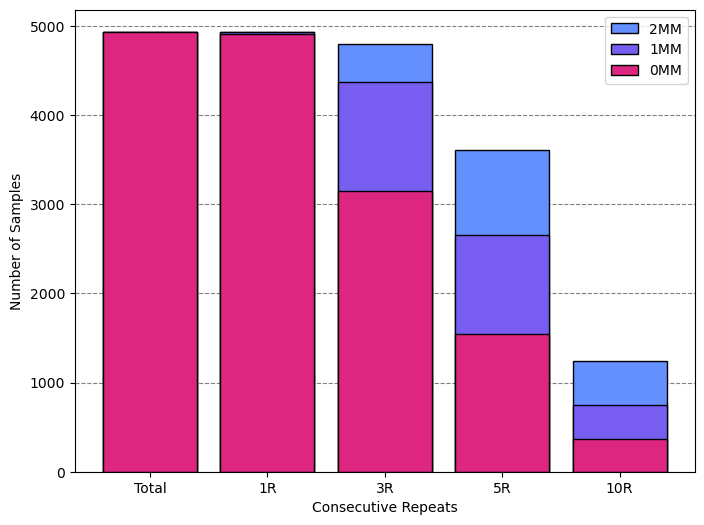

In [15]:
mm = ['2MM', '1MM', '0MM']
rr = ['1R', '3R', '5R', '10R']

palette = ['#648FFF', '#785EF0', '#DC267F']

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid()

for ix, mx in enumerate(mm):
    
    total_length = len(df[df['c'] == 0])
    length_1R = len(df[(df['c'] == 0) & (df[f'1R_{mx}_n'] > 0)])
    length_3R = len(df[(df['c'] == 0) & (df[f'3R_{mx}_n'] > 0)])
    length_5R = len(df[(df['c'] == 0) & (df[f'5R_{mx}_n'] > 0)])
    length_10R = len(df[(df['c'] == 0) & (df[f'10R_{mx}_n'] > 0)])

    # Create the bar plot
    labels = ['Total', '1R', '3R', '5R', '10R']
    lengths = [total_length, length_1R, length_3R, length_5R, length_10R]

    plt.bar(labels, lengths, edgecolor='black', label=mx, color=palette[ix])

ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(False)
ax.set_axisbelow(True)

plt.legend()
plt.xlabel('Consecutive Repeats')
plt.ylabel('Number of Samples')
plt.show()

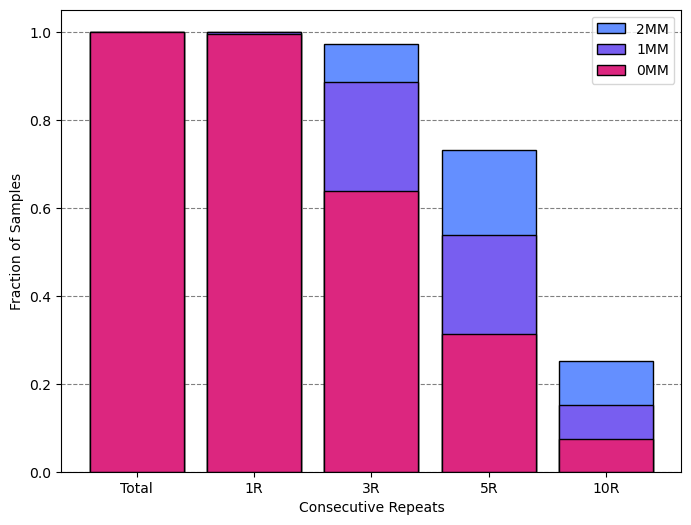

In [16]:
mm = ['2MM', '1MM', '0MM']
rr = ['1R', '3R', '5R', '10R']

palette = ['#648FFF', '#785EF0', '#DC267F']

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid()

for ix, mx in enumerate(mm):
    
    total_length = len(df[df['c'] == 0])
    length_1R = len(df[(df['c'] == 0) & (df[f'1R_{mx}_n'] > 0)])
    length_3R = len(df[(df['c'] == 0) & (df[f'3R_{mx}_n'] > 0)])
    length_5R = len(df[(df['c'] == 0) & (df[f'5R_{mx}_n'] > 0)])
    length_10R = len(df[(df['c'] == 0) & (df[f'10R_{mx}_n'] > 0)])

    # Create the bar plot
    labels = ['Total', '1R', '3R', '5R', '10R']
    lengths = [total_length/total_length, length_1R/total_length, length_3R/total_length, length_5R/total_length, length_10R/total_length]

    plt.bar(labels, lengths, edgecolor='black', label=mx, color=palette[ix])

ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(False)
ax.set_axisbelow(True)

plt.legend()
plt.xlabel('Consecutive Repeats')
plt.ylabel('Fraction of Samples')
plt.show()

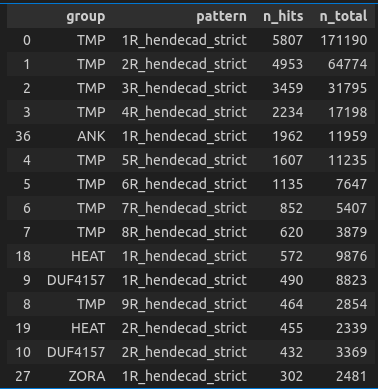